In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## **Описание проекта**

In [2]:
try:
    df = (
    pd.read_csv('D:/datasets/games.csv') 
)
except FileNotFoundError:
    print("File not found.")
except pd.errors.EmptyDataError:
    print("No data")
except pd.errors.ParserError:
    print("Parse error")
except Exception:
    print("Some other exception")

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


**`Rating`**:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
- «T» («Teen») — «Подросткам 13—19 лет»
- «M» («Mature») — «От 17 лет»
- «AO» («Adults Only 18+»
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»:

## **Предобработка данных**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.columns = df.columns.str.lower()


text = ['name', 'platform', 'genre', 'rating']
for index in text:
    df[index] = df[index].str.lower()

In [6]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Не имеем возможность восстановить 2 пропуска в столбце `name`(название игры) и 269 пропусков в стобце `year_of_release`(год выпуска), т.к. от общего количества пропуски занимают маленькую долю, удалим их.**

In [7]:
df = df.dropna(subset = ['name'])
df = df.dropna(subset = ['year_of_release'])

In [8]:
df['rating'].value_counts()
df['rating'] = df['rating'].fillna('rp')

In [9]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

- **Абревиатура `TBD` в столбце `user_score` означает `To Be Determined(Будет определено)`**

- **Заменим значения `TBD` на `NaN` для дальнейшей работы**

In [10]:
df.loc[df['user_score'] =='tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float64')

In [11]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

+ добавить общее кол-во продаж!
+ добавить категоризацию по ней заполнить значения!

In [12]:
df['total_sales'] = df.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('NaN')
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

**Открыв датасет, былы выявлены и заполнены пропуски, привели столбцы к нужным типам данных, а также добавили стобец `total_sales` с общим кол-вом продаж всех регионов.**

## **Исследовательский анализ данных**

 ### Посмотрим, сколько игр выпускалось в разные годы.

- Также отсеем данные до 1994 года, т.к. этот тип данных никак не смогут повлиять на анализ и не описывает реальной картины.

In [15]:
game_for_years = df.groupby('year_of_release').agg({'name':'count'})
game_for_years = game_for_years.query('year_of_release >= 1994')

- Самые успешный период игровой индустрии: **2005-2011 года**
- С 2012 года заметен явный спад выпуска игр.

<AxesSubplot:xlabel='year_of_release'>

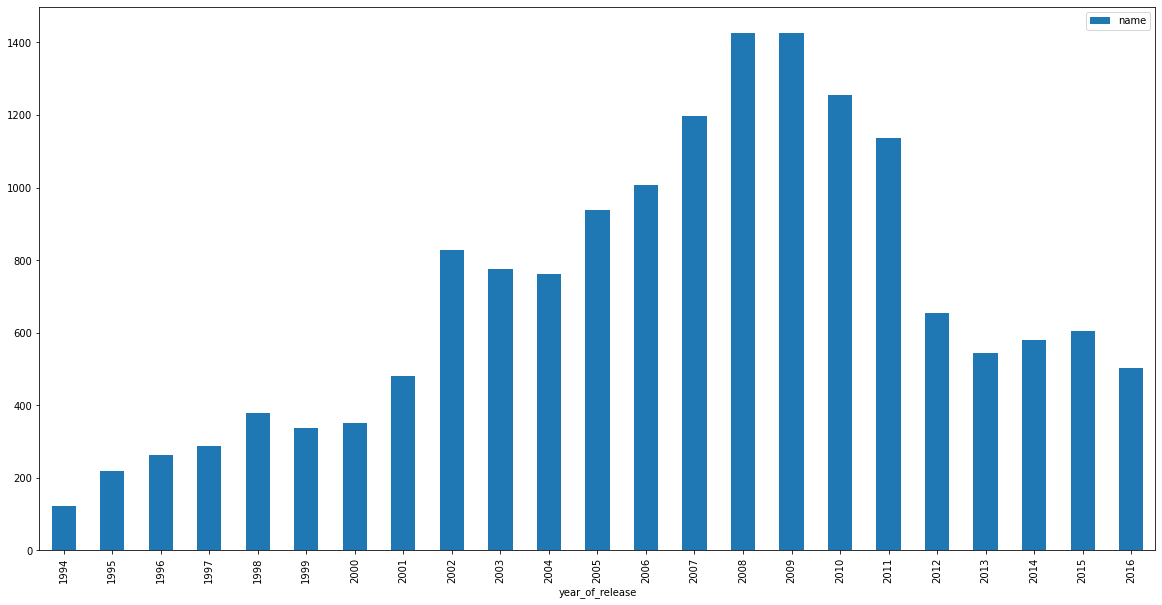

In [16]:
game_for_years.plot(
    y='name', kind='bar', figsize=(20,10),
)

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Можно заметить что в 3ку самых касовых платформ входят 2 платформы:
- PS2 и PS3 суммарно обгоняют платформу X360 в 2 раза.
- Игровая приставка Wii в наш период игрвой индустрии еще имеет огромную популярность, также как и ее младший собрат портативных приставок DS.

In [17]:
top_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

top_platform = top_platform.head(11).reset_index()
top_platforms_dict = top_platform['platform'].unique() 
top_platform

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


### Для сравнения возьмем топ11 платформ, в 10ку входят консоли и портативные игровые системы, для более разнообразного анализа, добавим в рейтинг персональный компьютер.

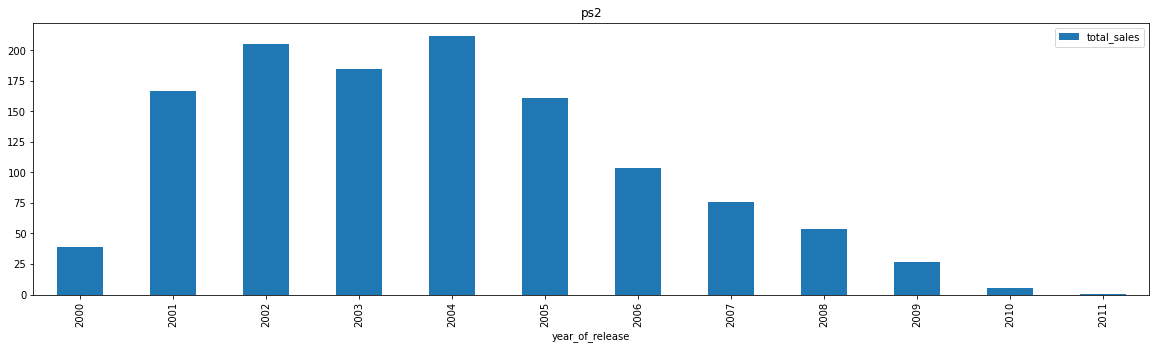

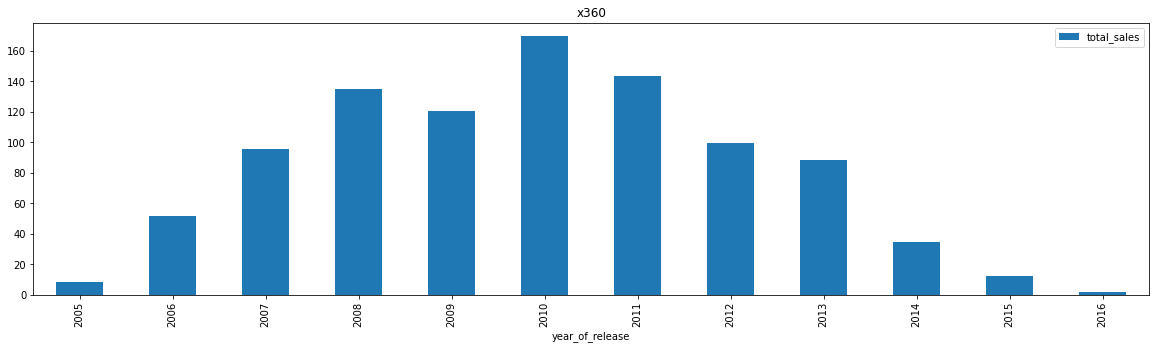

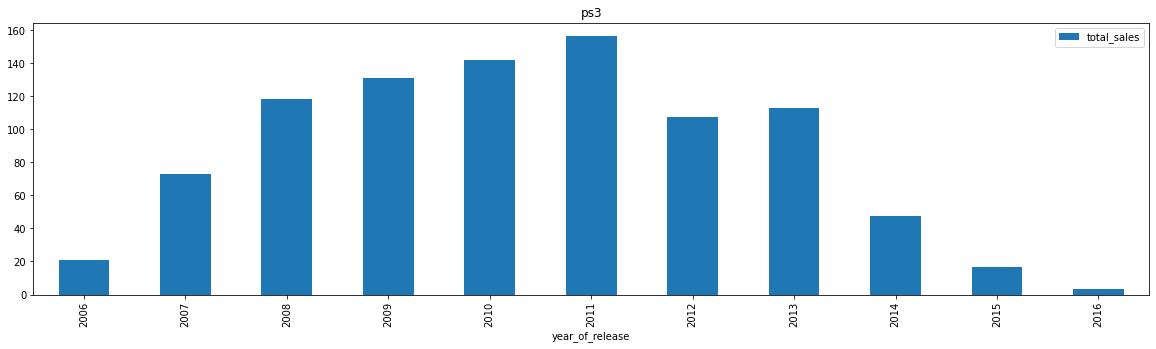

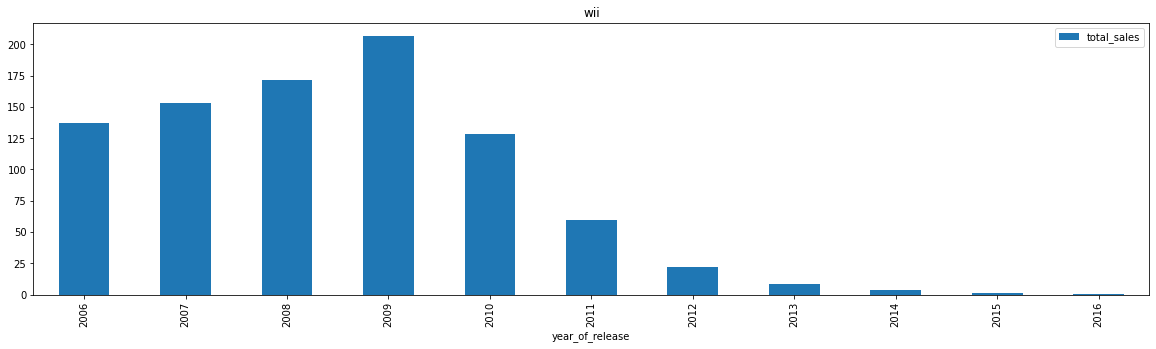

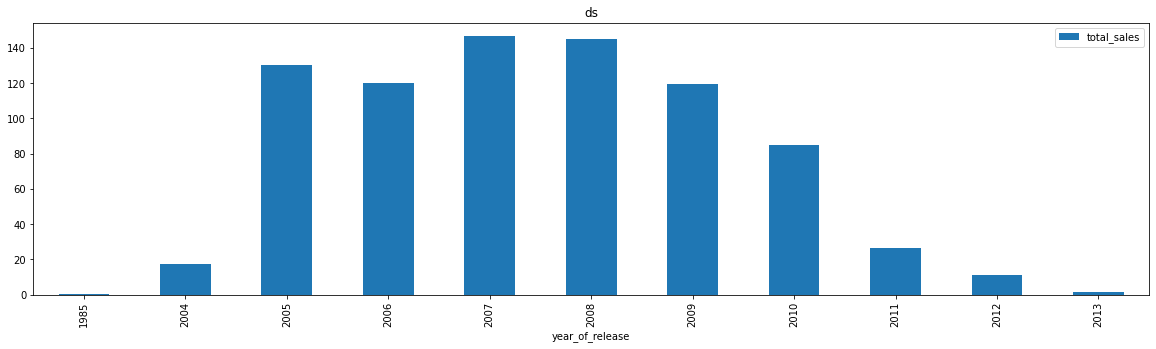

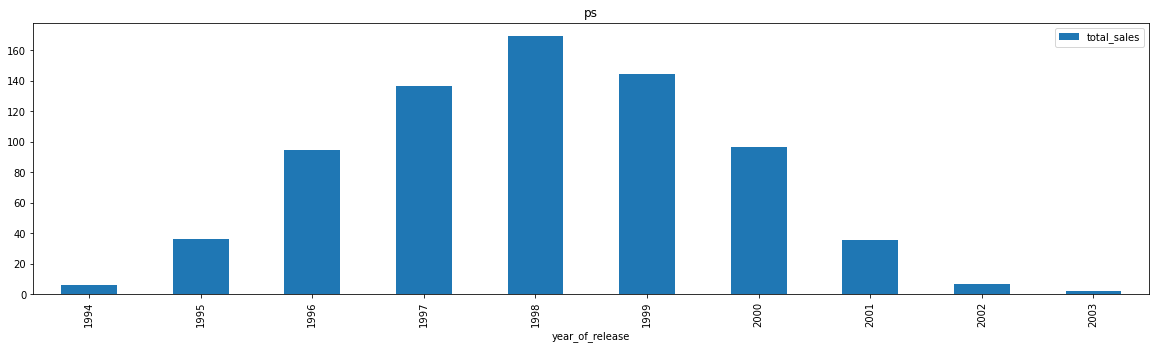

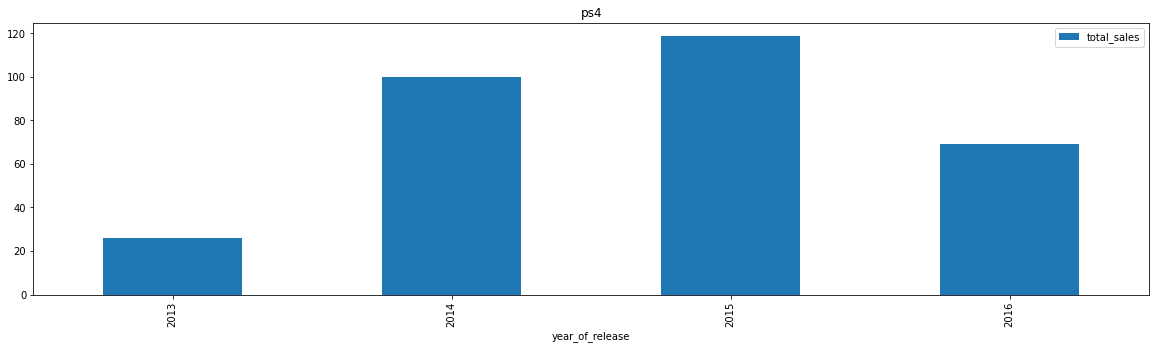

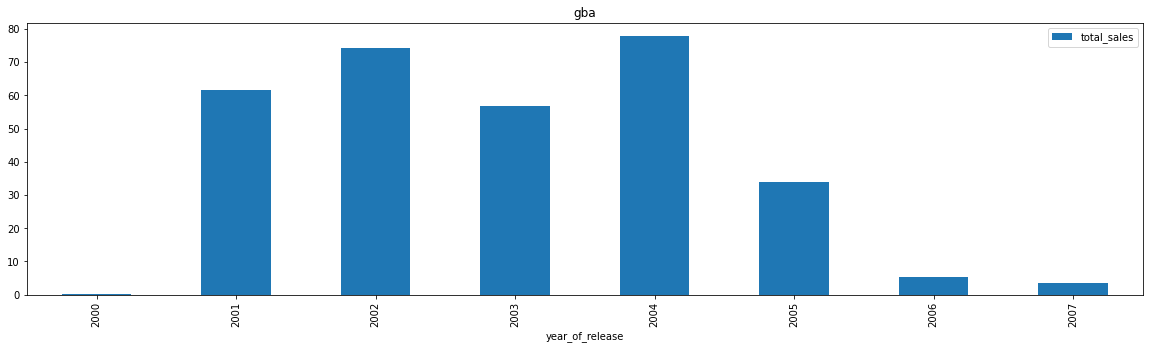

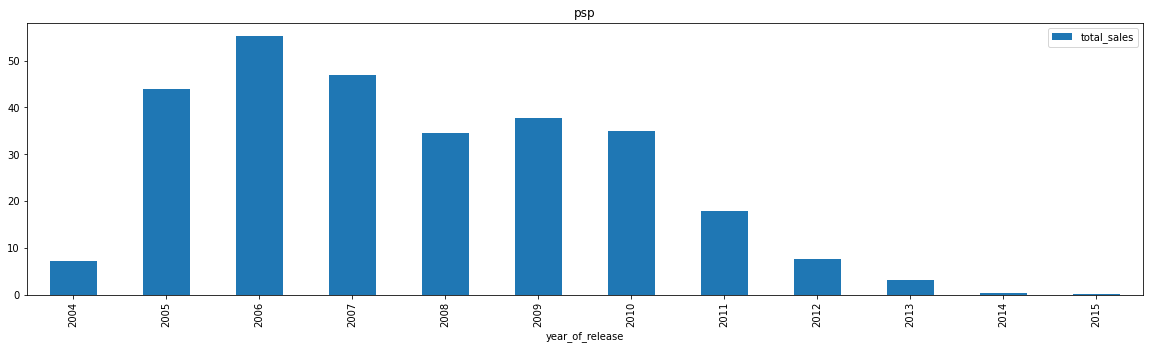

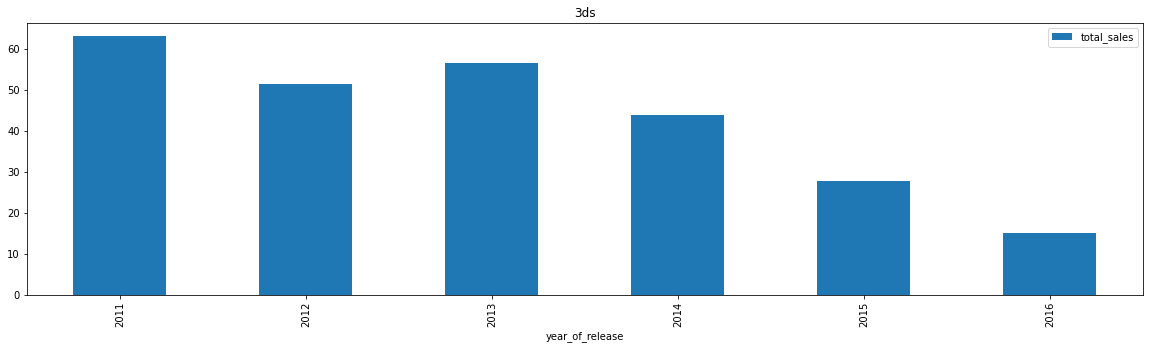

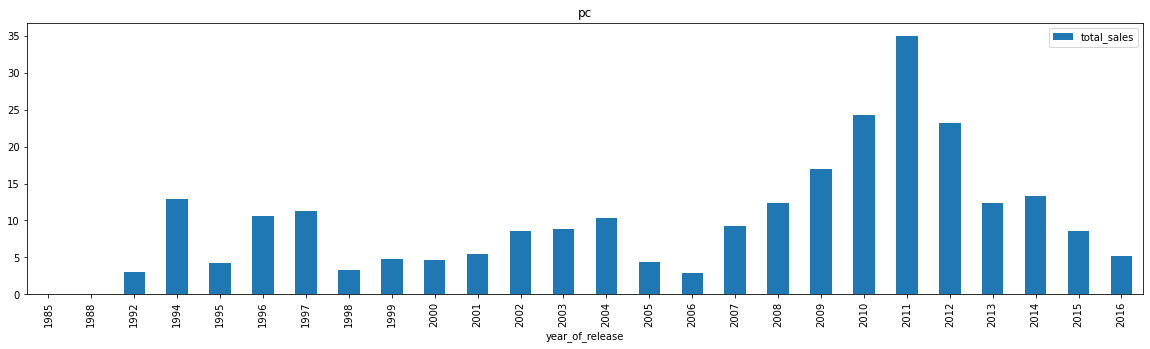

In [18]:
for platform in top_platforms_dict:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(20,5))
    plt.title(platform)

- PlayStation 2 с самыми большими продажами в период 2001-2006 г. к в 2011 году платформа больше не актуальна, т.к. в 2006г. появляется следующее поколение PlayStation 3 с большими продажами в период 2006-2013 г.


- Можно заметить, что практически весь рынок занимает консоль от PS.


- XBOX360 занимает 2ю строчку в рейтинге общих продаж, за 10 лет компании удалось продать свыше 961 миллионов копий игр.


- Нинтендо и остальные портативные консоли обходят портативный компьютер, который занимает лишь 11 место в рейтинге самых кассовых платформ.

**Каждой платформе необходимо разное количество времени для взлета/падения с рынка платформ. PC занимающая лишь 11 место в общих продажах игр падение не светит ближайшие десять лет, в то время как игровой приставке 7го поколения WII хватило 5 лет жизни больших продаж, как за последующие 3 года платформа полностью утратила свою актуальность.** 

- Учтем, что датасет имеет не полные данные за 2016 год, за актуальный период примем последние 4 года, а именно: 2013-2016г.

<AxesSubplot:xlabel='year_of_release'>

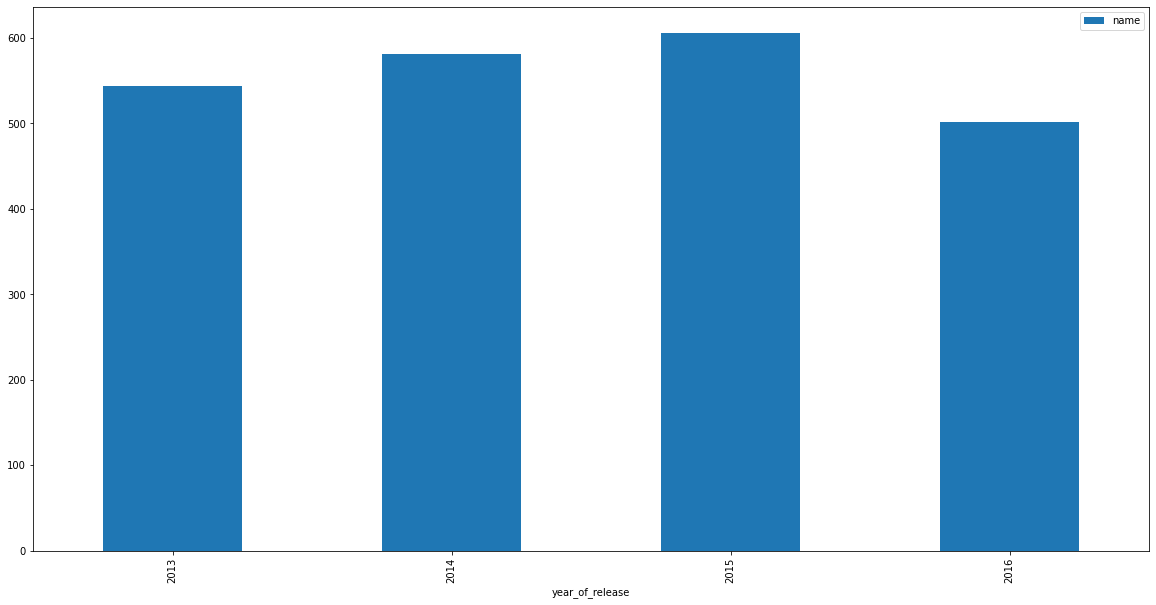

In [19]:
df_act = df.query('2013<= year_of_release <= 2016')
df_act = df_act.query('platform != ["ps2", "dc"]')
df_act_gb = df_act.groupby('year_of_release').agg({'name':'count'})

df_act_gb.plot(
    y='name', kind='bar', figsize=(20,10),
)

- **Можно заметить как произошла смена поколений, на смену PS3 успешно вошла PS4, также заметим что XONE хоть и входит в топ3 плафторм 2013-2016 года, но также успешно заменить X360 она не смогла.**

In [20]:
pivot_act = df_act.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
pivot_act_dict = pivot_act['platform'].unique() 
pivot_act

,platform,total_sales
4,ps4,314.14
3,ps3,181.43
10,xone,159.32
0,3ds,143.25
9,x360,136.80
8,wiiu,64.63
2,pc,39.43
6,psv,32.99
7,wii,13.66
5,psp,3.50


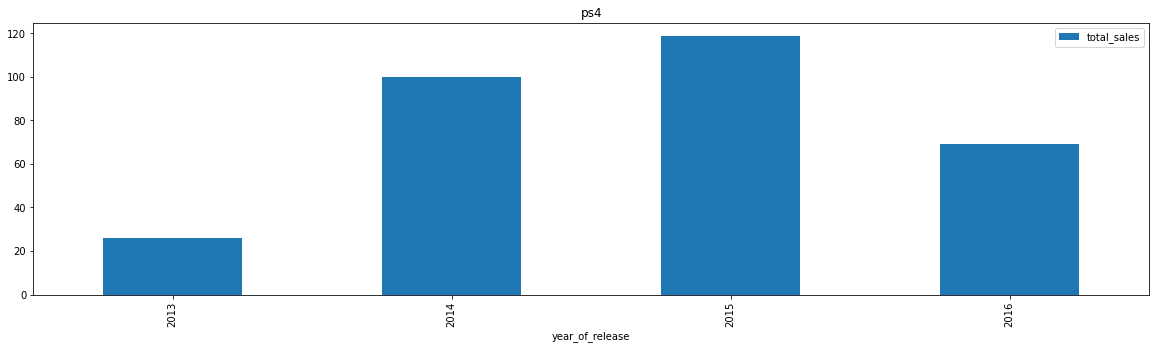

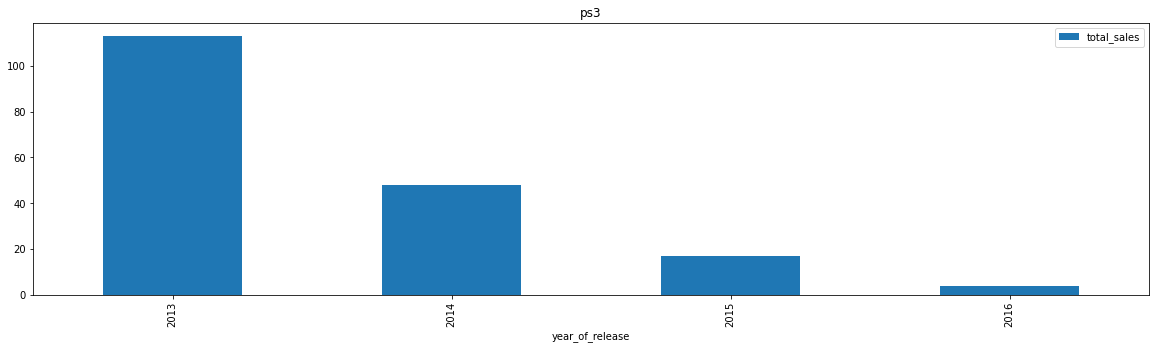

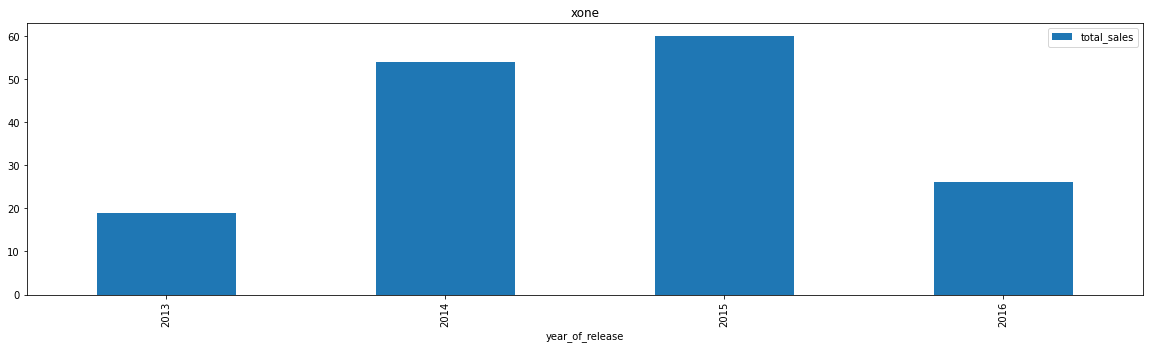

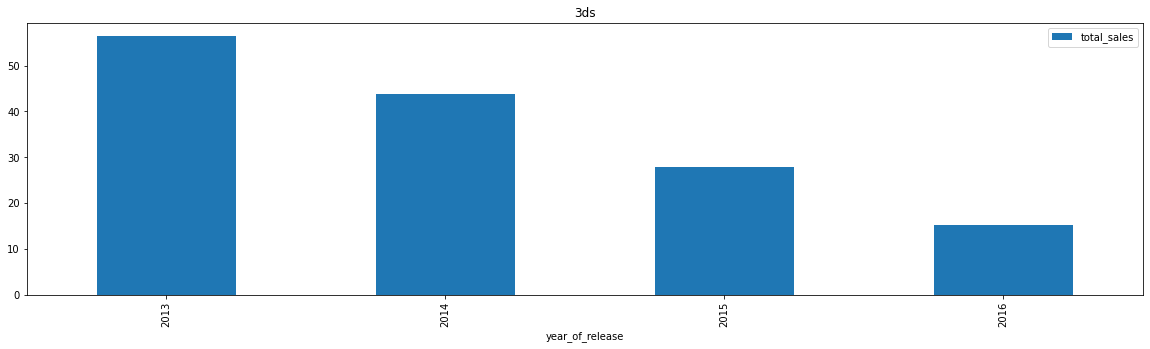

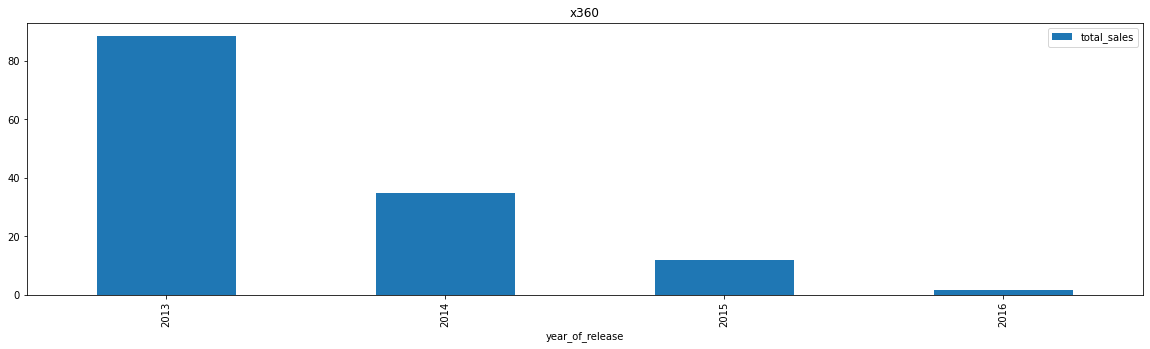

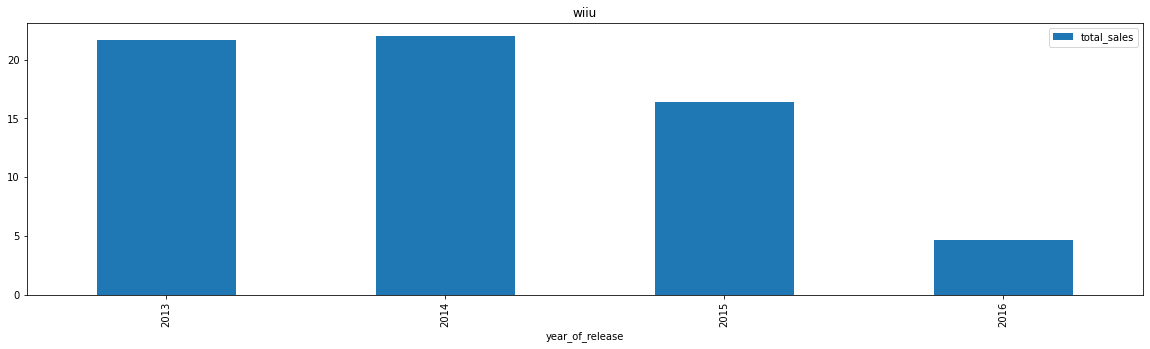

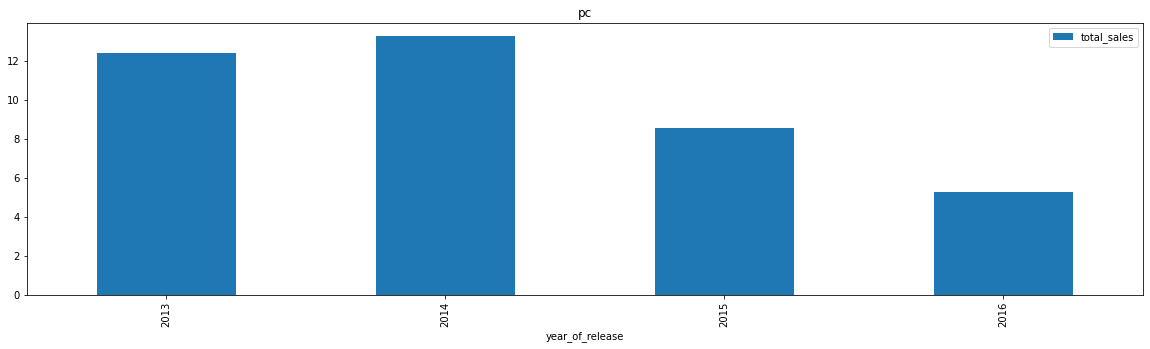

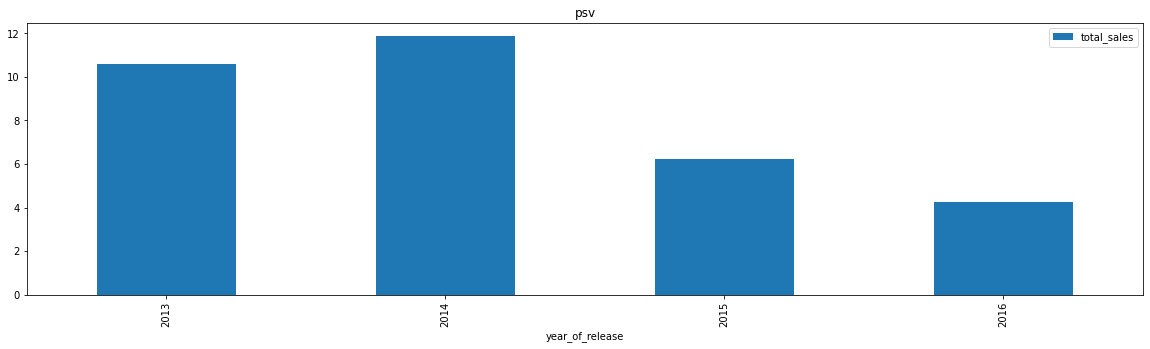

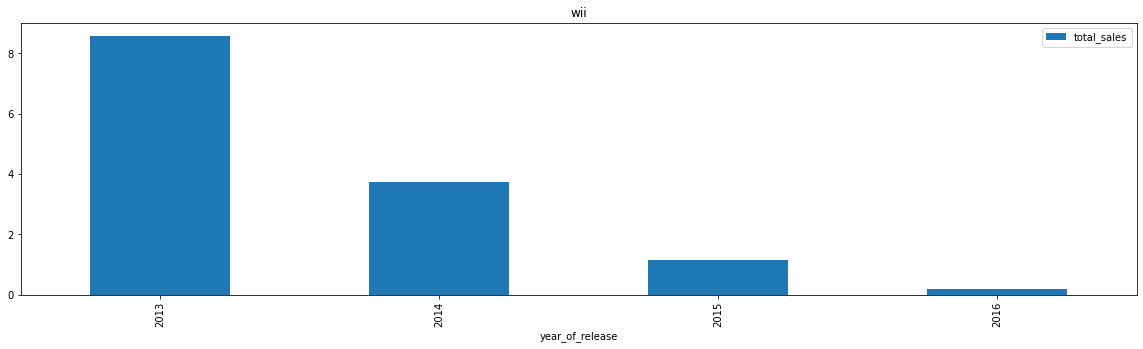

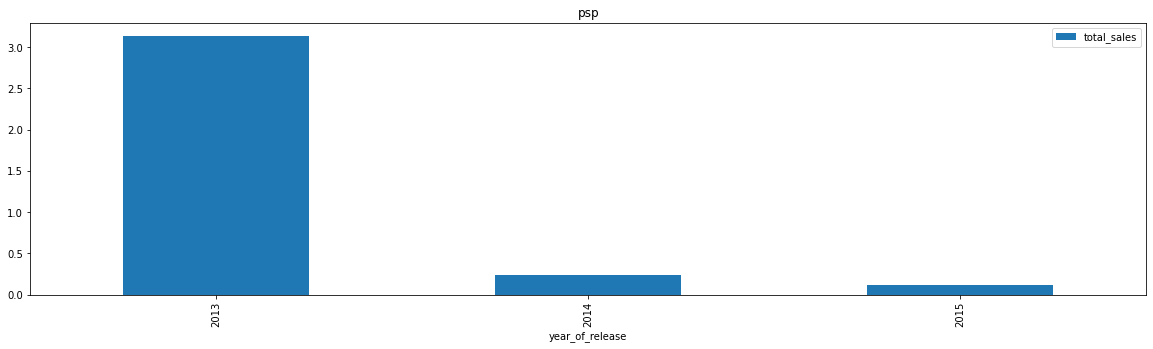

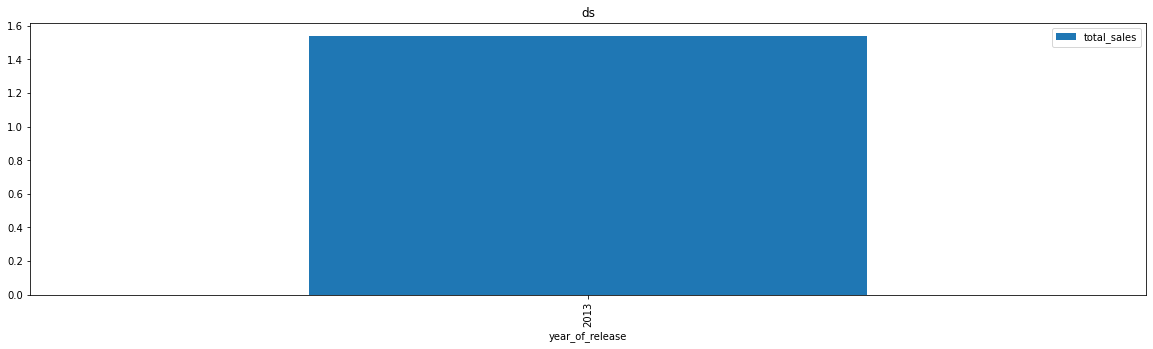

In [21]:
for platform in pivot_act_dict:
    df_act[df_act['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(20,5))
    plt.title(platform)

- Заметен спад PS4, это обусловлено переходом платформы на более новую в 2016 году.

- Также заметен спад XONE, в 2016 году выйдет новое поколение. 


**Данные в датасет не учтены, но стоит обратить внимание на это, т.к. уменьшение продаж не связано с уменьшением популярности платформ, а говорит только о том, что компании решили обновлять свои платформы намного чаще, т.к. скачок технологий позволял это сделать!**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

**Без ограничений по оси продаж**

(0.0, 6.0)

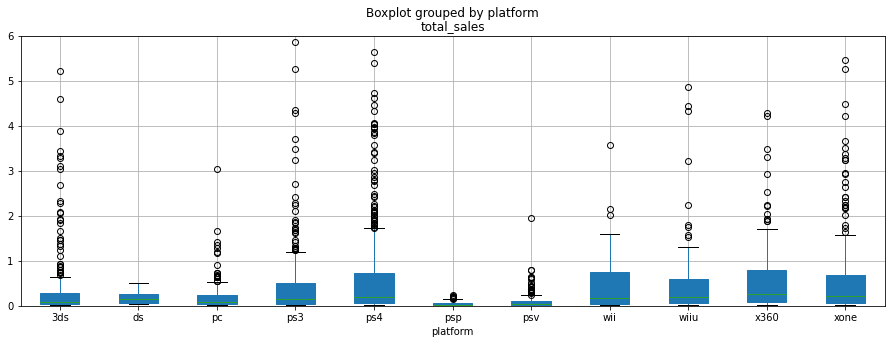

In [22]:
df_act.boxplot(
    'total_sales',
    by='platform',
    figsize=(15,5),
    patch_artist = True,
).set_ylim(0,6)

**- Убрав ограничения по оси суммарных продаж платформы, мы можем заметить, что самую кассовую игру выпустила платформа PS3, а платформа PS4 имеет большоо количество выбросов, мы можем сделать вывод, что PS4 успешно сменила PS3.**

**С ограничениями по оси продаж**

(0.0, 0.9)

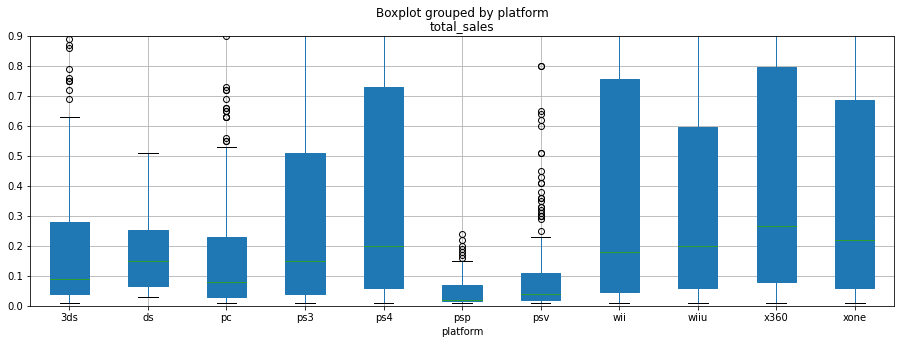

In [23]:
df_act.boxplot(
    'total_sales',
    by='platform',
    figsize=(15,5),
    patch_artist = True,
).set_ylim(0,0.9)

- **Построив график с ограничениями по оси продажможем заметить, что медиана продаж у всех платформ схожа.**


- **Медиана меньше среднего.**


- **Графики скошены вправо.**


### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

- Сформулируем выводы.

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж платформы PS4 от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

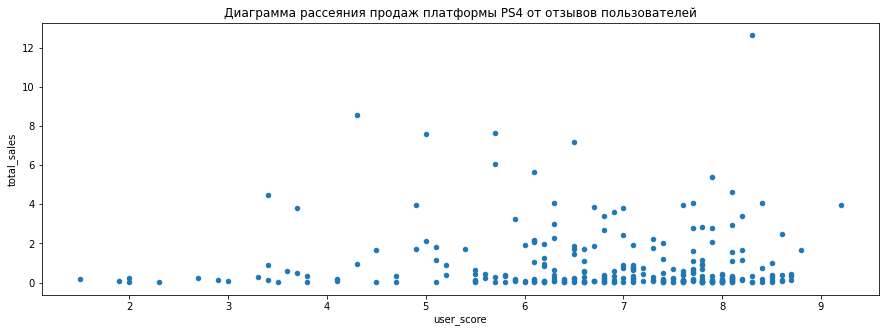

In [24]:
df_act.query('platform=="ps4"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы PS4 от отзывов пользователей')

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж платформы PS4 от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

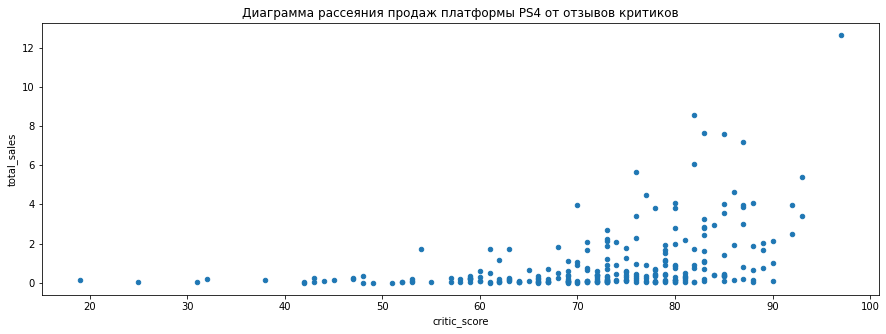

In [25]:
df_act.query('platform=="ps4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы PS4 от отзывов критиков')

- **Можем заметить зависимость между оценкой пользователей и критиков. Более высокая оценка подразумевает больший шанс на многомиллионые продажи.**

- **В виде исключения можем заметить игру с продажами 20+ миллионов с оценкой в районе 75 от пользователей и критиков соответственно.**

### Соотнесем выводы с продажами игр на других платформах.

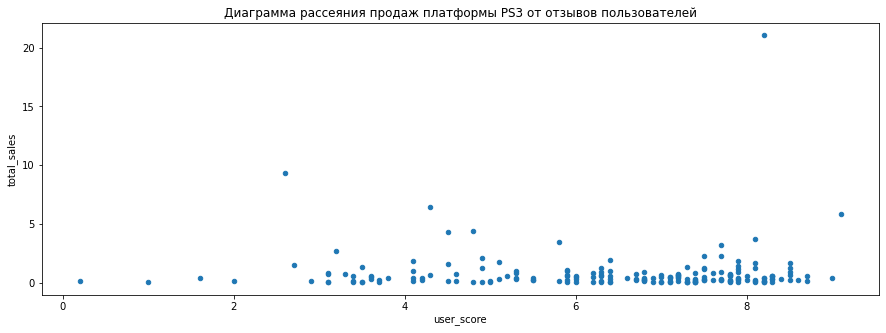

In [26]:
df_act.query('platform=="ps3"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы PS3 от отзывов пользователей')
ps3 = df_act.query('platform=="ps3"')

0.3342853393371919

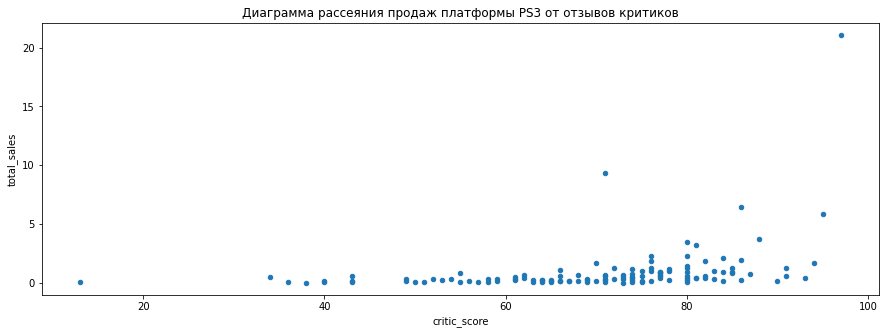

In [27]:
df_act.query('platform=="ps3"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы PS3 от отзывов критиков')
ps3['total_sales'].corr(ps3['critic_score'])

-0.06892505328279412

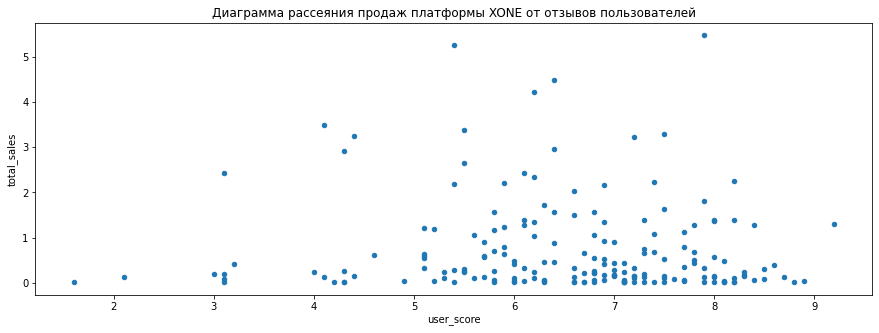

In [28]:
df_act.query('platform=="xone"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы XONE от отзывов пользователей')
xone = df_act.query('platform=="xone"')
xone['total_sales'].corr(xone['user_score'])

0.41699832800840175

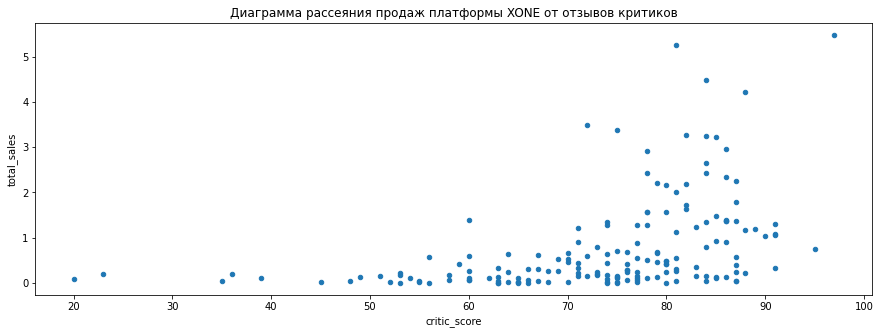

In [29]:
df_act.query('platform=="xone"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы XONE от отзывов критиков')
xone['total_sales'].corr(xone['critic_score'])

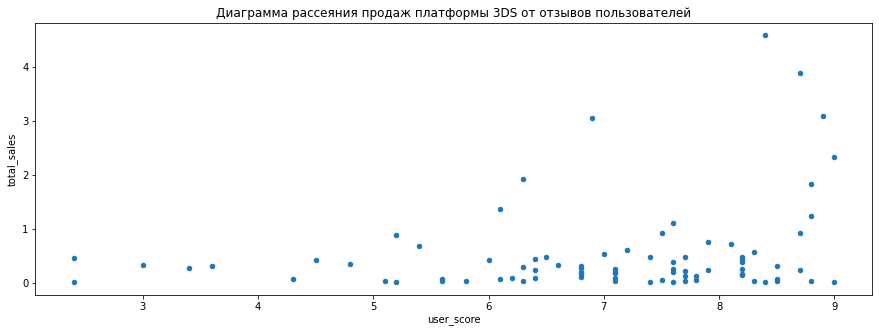

In [30]:
df_act.query('platform=="3ds"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы 3DS от отзывов пользователей')
platform_3ds = df_act.query('platform=="3ds"')


0.35705661422881035

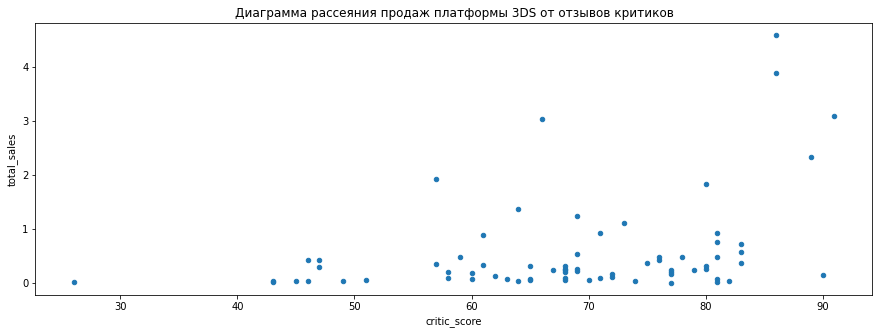

In [31]:
df_act.query('platform=="3ds"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(15,5),title='Диаграмма рассеяния продаж платформы 3DS от отзывов критиков')
platform_3ds['total_sales'].corr(platform_3ds['critic_score'])

**Для сравнения взяли дополнительно топ3 после PS4, построили диаграммы рассеяния от отзывов пользователей/критиков/**

- **Можем заметить общую слабу взаимосвязь объемов продаж и оценкой пользователей, т.к. у каждого пользователя свои показатели оценки той или иной игры, зачастую они субъективны, в то время как критики зачастую пользуются одними и теми же критеями оценки игры.**


- **Платформы Wii & DS имеют достаточно слабую корреляцию по отношению к отзывам критиков.**


- **Платформа PS3 имеет более сильную корреляцию, нежели X360 по отношению продаже к отзывам критиков.**

### Посмотрим на общее распределение игр по жанрам. 
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='genre'>

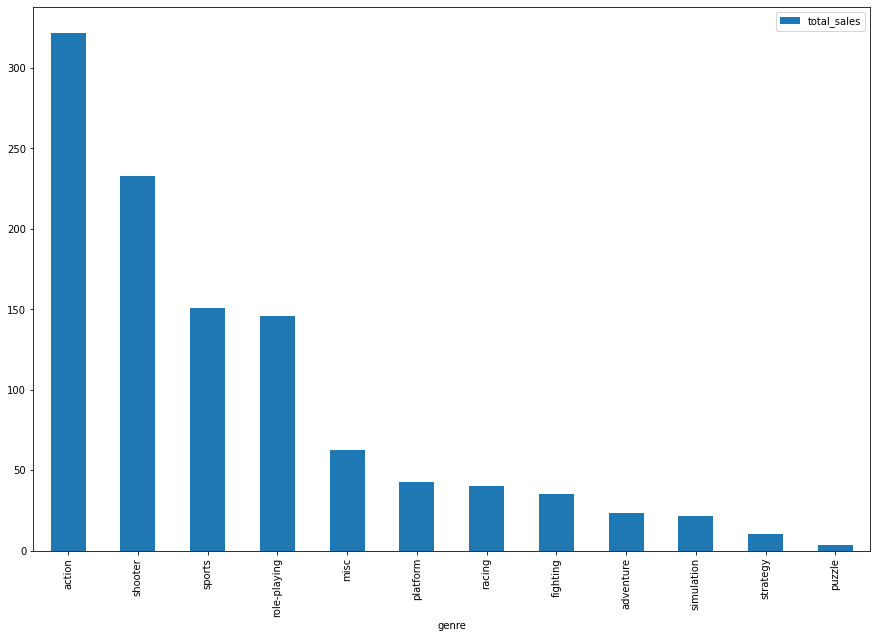

In [32]:
(
 df_act
 .pivot_table(index='genre', aggfunc={'total_sales':sum})
 .sort_values(by='total_sales', ascending=False)
 .plot(y='total_sales', kind='bar', figsize=(15, 10))
)

In [33]:
genre_p = df_act.groupby('genre').agg({'name':'count','total_sales':['median','sum']})
genre_p.columns = ['count', 'median','sum']
genre_p

,count,median,sum
genre,,,
action,766,0.110,321.87
adventure,245,0.030,23.64
fighting,80,0.125,35.31
misc,155,0.100,62.82
platform,74,0.225,42.63
puzzle,17,0.060,3.17
racing,85,0.120,39.89
role-playing,292,0.125,145.89
shooter,187,0.450,232.98


- **Для большей наглядности сделаем круговую диаграмму.**

<AxesSubplot:ylabel='genre'>

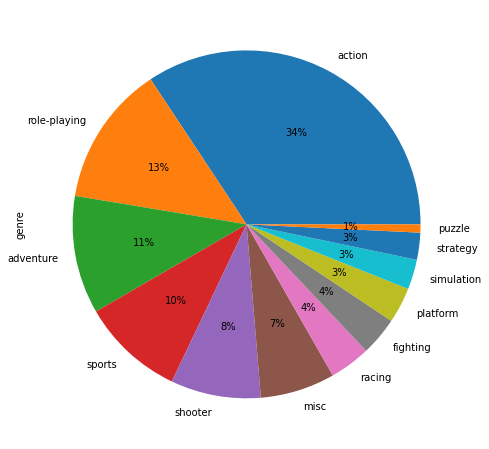

In [34]:
df_act['genre'].value_counts().plot(kind='pie', figsize=(8, 8), legend=False, autopct='%.0f%%')

**Посмотрев на таблицу, можно сделать следующие выводы:**

- В жанре `action` имеется целых 2381 игра с самыми большими ожидаемыми продажами, но количество игр не является показателем кассовости.

- Самое крупное медианное значение имеет жанр `shooter`, хотя количество игр в 3 раза меньше жанра `action`. Также данный жанр входит в топ3 по продажам.

- Жанр `adventure` при достаточно высоком количестве игр имеет самый низкий показатель медианны и также имеет одно из низких уровней продаж.

**Продажи могут быть успешны в жанре и без огромного количества выпущенных игр, популярность может набрать любой жанр вне зависимости от каких-либо на то внешних факторов.**

##  **Портрет пользователя каждого региона(NA, EU, JP)**

**`Rating`**:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
- «T» («Teen») — «Подросткам 13—19 лет»
- «M» («Mature») — «От 17 лет»
- «AO» («Adults Only 18+»
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»:

### Портрет пользователя `NA` региона

- **ТОП5 ПЛАТФОРМ `NA` региона**

In [35]:
na_users = df_act.pivot_table(index = 'platform', values=['na_sales', 'total_sales'],aggfunc=('sum'))
na_users = na_users.sort_values(by='na_sales', ascending=False).head(5)
na_users

,na_sales,total_sales
platform,,
ps4,108.74,314.14
xone,93.12,159.32
x360,81.66,136.80
ps3,63.50,181.43
3ds,38.20,143.25


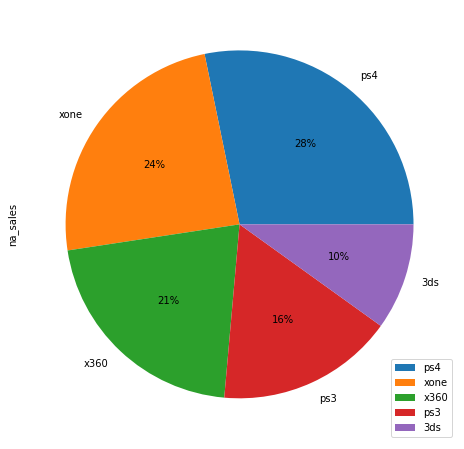

In [36]:
na_users.plot(kind='pie', y='na_sales', subplots=True, figsize=(8, 8), autopct='%.0f%%')
plt.show()

- **ТОП5 ЖАНРОВ `NA` региона**

In [37]:
na_genres=df_act.pivot_table(index='genre',values=['na_sales'],aggfunc=('sum'))
na_genres = na_genres.sort_values(by='na_sales', ascending=False).head(5)
na_genres

,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


- **Влияние рейтинга на продажи в `NA` регионе**

In [38]:
na_esrb=df_act.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))
na_esrb=na_esrb.sort_values(by='na_sales',ascending=False)
na_esrb

,na_sales
rating,
m,165.21
rp,89.42
e,79.05
e10+,54.24
t,49.79


- В топ3 платформ вошли PS4, XONE  & X360.

- Самыми популярными жанрами оказались Action & Shooter & Sports.

- Больше всех продаж имеют игры +17 и игры для всех возрастов, также видим, что 2ю строчку занимают игры без рейтинга.

### Портрет пользователя `EU` региона

- **ТОП5 ПЛАТФОРМ `EU` региона**

In [39]:
eu_users = df_act.pivot_table(index = 'platform', values=['eu_sales', 'total_sales'],aggfunc=('sum'))
eu_users = eu_users.sort_values(by='eu_sales', ascending=False).head(5)
eu_users

,eu_sales,total_sales
platform,,
ps4,141.09,314.14
ps3,67.81,181.43
xone,51.59,159.32
x360,42.52,136.80
3ds,30.96,143.25


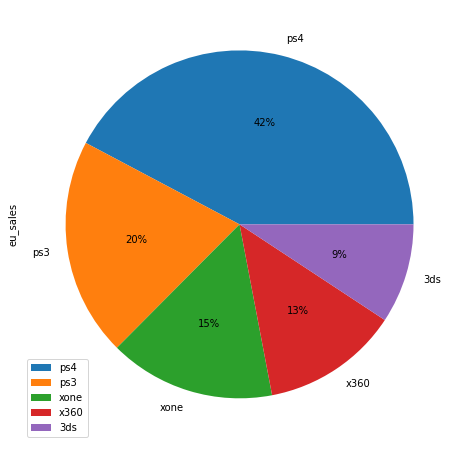

In [40]:
eu_users.plot(kind='pie', y='eu_sales', subplots=True, figsize=(8, 8), autopct='%.0f%%')
plt.show()

- **ТОП5 ЖАНРОВ `EU` региона**

In [41]:
eu_genres=df_act.pivot_table(index='genre',values=['eu_sales'],aggfunc=('sum'))
eu_genres = eu_genres.sort_values(by='eu_sales', ascending=False).head(5)
eu_genres

,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


- **Влияние рейтинга на продажи в `EU` регионе**

In [42]:
eu_esrb=df_act.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))
eu_esrb=eu_esrb.sort_values(by='eu_sales',ascending=False)
eu_esrb

,eu_sales
rating,
m,145.32
e,83.36
rp,78.91
e10+,42.69
t,41.95


- В топ3 платформ вошли PS4, PS3, XONE.

- Самыми популярными жанрами оказались Action & Shooter & Sports.

- Больше всех продаж имеют игры без ограничения по возрасту, дальше следуют +17 и замыкают топ3 игры без рейтинга.

### Портрет пользователя `JP` региона

- **ТОП5 ПЛАТФОРМ `JP` региона**

In [43]:
jp_users = df_act.pivot_table(index = 'platform', values=['jp_sales', 'total_sales'],aggfunc=('sum'))
jp_users = jp_users.sort_values(by='jp_sales', ascending=False).head(5)
jp_users

,jp_sales,total_sales
platform,,
3ds,67.81,143.25
ps3,23.35,181.43
psv,18.59,32.99
ps4,15.96,314.14
wiiu,10.88,64.63


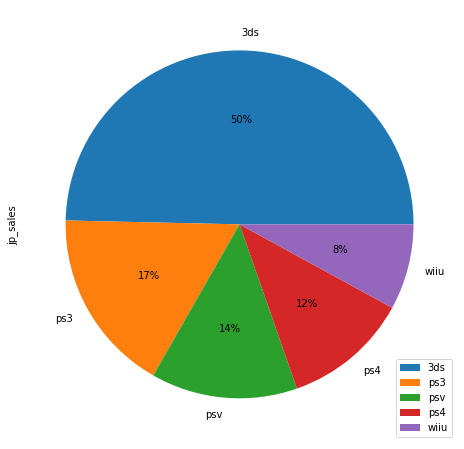

In [44]:
jp_users.plot(kind='pie', y='jp_sales', subplots=True, figsize=(8, 8), autopct='%.0f%%')
plt.show()

- **ТОП5 ЖАНРОВ `JP` региона**

In [45]:
jp_genres=df_act.pivot_table(index='genre',values=['jp_sales'],aggfunc=('sum'))
jp_genres = jp_genres.sort_values(by='jp_sales', ascending=False).head(5)
jp_genres

,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61


- **Влияние рейтинга на продажи в `JP` регионе**

In [46]:
jp_esrb=df_act.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))
jp_esrb=jp_esrb.sort_values(by='jp_sales',ascending=False)
jp_esrb

,jp_sales
rating,
rp,85.05
t,20.59
e,15.14
m,14.11
e10+,5.89


- В топ3 платформ вошли 3ds, PS3, PSV

- Самыми популярными жанрами оказались Role-playing, action, misc

- Большую часть игр не имеют рейтинга RP, очень маленькую часть занимают игры с рейтингом «T» («Teen») — «Подросткам 13—19 лет» и E - «Для всех»

### Рейтинг ESRB

- **Построим сводную таблицу рейтингов в зависимости от региона продаж.**

In [47]:
esrb = df_act.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
esrb

,eu_sales,jp_sales,na_sales
rating,,,
e,83.36,15.14,79.05
e10+,42.69,5.89,54.24
m,145.32,14.11,165.21
rp,78.91,85.05,89.42
t,41.95,20.59,49.79


Для Европы и Америки большую часть игр составляют игры с рейтингом **«M» («Mature») — «От 17 лет»**. В то время как в Японии преобладают игры **«T» («Teen») — «Подросткам 13—19 лет» и «E» («Everyone») — «Для всех»**. Можно заметить, что в выборе платформы EU и NA очень схожи, также похож выбор жанров игр и их рейтинга ESRB. В то время как Японцы выбирают абсолютно другие жанры, платформы и большую часть рейтинга составляют игры **«RP» ( «Rating Pending»») — «Рейтинг ожидается»**.

### Вывод портретов

- в `NA` 28% рынка занимает платформа PS4, 24% & 21% делят домашняя для региона платформы XONE & X360.
- в `EU` 42% и 20%  рынка занимают PS4 & PS3, чуть меньшая доля у XONE - 15%.
- в `JP` XBOX даже не вошла в выборку, т.к. данный регион владеет компаниями Nintendo & PS, стоит отметить лидера рынка 3ds - 50%.

Для западного рынка лучшими жанрами остаются `Action & Sports & Shooter`, в то время как на Востоке игроки предпочитают `Role-playing`, в меньшей степени `Action и Misc`(игры не подходящие ни к одному из жанров, либо же владеющие в себе все жанры)


Большая половина рынка находится в регионе `NA`, в 2 раза меньше в `EU`, а `JP` показывает скромные показатели, т.к. большую половину игр JP регион выпускал в начале 00х, но эти данные никак не могут повлиять на 2017 год.

## **Проверка гипотез**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

h0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

h1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [48]:
df_act = df_act.dropna()
xone = st.variation(df_act.query('platform == "xone"')['user_score'])
pc = st.variation(df_act.query('platform == "pc"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(xone * 0.05 < abs(xone - pc)))

Равны ли дисперсии двух совокупностей? True


In [49]:
# самостоятельно назначим пороговое значение alpha.
alpha = 0.05

result = st.ttest_ind(df_act.query('platform == "xone"')['user_score'], df_act.query('platform == "pc"')['user_score'])

print('р-значение: ',result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.17306926618147322
Не получилось отвергнуть нулевую гипотезу


- P-уровень значимости равен 17%.

- Средние пользовательские рейтинги платформы XBOX ONE & PC практически не отличаются друг от друга.

### Средние пользовательские рейтинги жанров Action  и Sports разные.

h0: Cредние пользовательские рейтинги жанров Action и Sports равны.

h1: Cредние пользовательские рейтинги жанров Action и Sports различаются.

In [50]:
action = st.variation(df_act.query('genre == "action"')['user_score'])
sports = st.variation(df_act.query('genre == "sports"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(((action * 0.05) < abs(action - sports))))

Равны ли дисперсии двух совокупностей? True


In [51]:
# самостоятельно назначим пороговое значение alpha.
alpha = 0.05
result_two = st.ttest_ind(df_act.query('genre == "action"')['user_score'],
                             df_act.query('genre == "sports"')['user_score'],
                             equal_var=False)

print('р-значение: ',result_two.pvalue)
if result_two.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  1.0496920005008588e-13
Отвергаем нулевую гипотезу


- Значение p находится на уровне 1, в нормальных условиях означает, что есть веские доказательства против нулевой гипотезы

- Средние пользовательские рейтинги жанра Action & Sports слишком сильно отличаются друг от друга.

## **Общий вывод:**

- C 2005 по 2011 года считаются самыми успешными для разработчиков игр.

- Самой продаваемой платформой является PS (PS2 - 1233; PS3 - 931) следом идет X360 c 961 продаж. Заметна явная сменяемость поколений консоли, за год до появления заметен спад старой платформы/плавный переход на новую.

- Можем заметить зависимость между оценкой пользователей и критиков. Более высокая оценка подразумевает больший шанс на многомиллионые продажи.

- В виде исключения можем заметить игру с продажами 20+ миллионов с оценкой в районе 6 и 60 от пользователей и критиков соответственно.

- Отзывы пользователей не так сильно влияют на продажи, корреляция слабая.

- Корреляция отзывов критиков больше, видно прямую завивисимость оценки и объема продаж.

- В жанре action имеется целых 2381 игра с самыми большими ожидаемыми продажами, но количество игр не является показателем кассовости.

- Самое крупное медианное значение имеет жанр shooter, хотя количество игр в 3 раза меньше жанра action. Также данный жанр входит в топ3 по продажам.

- Жанр adventure при достаточно высоком количестве игр имеет самый низкий показатель медианны и также имеет одно из низких уровней продаж.

- в NA 28% рынка занимает платформа PS4, 24% & 21% делят домашняя для региона платформы XONE & X360.
- в EU 42% и 20%  рынка занимают PS4 & PS3, чуть меньшая доля у XONE - 15%.
- в JP XBOX даже не вошла в выборку, т.к. данный регион владеет компаниями Nintendo & PS, стоит отметить лидера рынка 3ds - 50%.
- Для западного рынка лучшими жанрами остаются Action & Sports & Shooter, в то время как на Востоке игроки предпочитают Role-playing, в меньшей степени Action и Misc(игры не подходящие ни к одному из жанров, либо же владеющие в себе все жанры)

- Большая половина рынка находится в регионе NA, в 2 раза меньше в EU, а JP показывает скромные показатели, т.к. большую половину игр JP регион выпускал в начале 00х, но эти данные никак не могут повлиять на 2017 год.

- Средние пользовательские рейтинги жанра Action & Sports и платформы XONE & PC практически не отличаются друг от друга.

